In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install keras.applications


     |████████████████████████████████| 51kB 7.2MB/s 


In [3]:
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras import applications
from keras.applications.resnet50 import ResNet50
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from keras.models import Model
from keras.layers.core import Dense, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D
from keras.layers import Input, Dropout
from keras.layers.merge import concatenate, add
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2
from keras.utils.layer_utils import convert_all_kernels_in_model
from keras.utils.data_utils import get_file
from keras.engine.topology import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
import keras.backend as K
from keras.applications.resnet50 import preprocess_input, decode_predictions

In [4]:
 model = MobileNetV2(
   weights = 'imagenet',
   include_top = True,
   alpha = 1.0)

 model.summary()

 epochs = 144
 img_size = 224

 input_tensor = Input(shape=(img_size, img_size, 3))

 base_model = MobileNetV2(
     weights='imagenet',
     include_top = False,
     input_tensor = input_tensor)

14540800/14536120 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________

In [5]:
 model = MobileNetV2(
   weights = 'imagenet',
   include_top = True,
   alpha = 1.0)

 model.summary()

 epochs = 144
 img_size = 336

 input_tensor = Input(shape=(img_size, img_size, 3))

 base_model = MobileNetV2(
     weights='imagenet',
     include_top = False,
     input_tensor = input_tensor)

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [6]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
output = Dense(5,activation='softmax')(x)

model = Model(inputs=base_model.input,outputs=output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 336, 336, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 168, 168, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 168, 168, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 168, 168, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [7]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.0,
    width_shift_range=0.2,
    height_shift_range=0.2)

valid_datagen = ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/cassava_aug_data/train',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(
        '/content/drive/MyDrive/cassava_aug_data/val',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical',
        shuffle = False)

Found 6000 images belonging to 5 classes.
Found 1500 images belonging to 5 classes.


In [8]:
valid_generator.class_indices

{'cbb': 0, 'cbsd': 1, 'cgm': 2, 'cmd': 3, 'healthy': 4}

In [ ]:

x_batch, y_batch = next(train_generator)

In [ ]:
from keras.optimizers import Adam,SGD
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint


model.compile(loss='categorical_crossentropy',
              optimizer = SGD(lr = 1e-5,momentum=0.9),
              metrics = ['accuracy'])

early_stop = EarlyStopping(
     monitor='val_loss',
     patience=10,
     verbose=1,
     restore_best_weights=False)

filepath="/content/drive/MyDrive/Augmented_Data/cassava-aug-mobnet224.hdf5"

checkpoint = ModelCheckpoint(
     filepath,
     monitor='val_acc',
     verbose=1,
     save_best_only=True,
     mode='max',
     period = 5)

In [ ]:
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 144,
                   callbacks = [checkpoint])

Epoch 1/144
187/187 [==============================] - 2567s 14s/step - loss: 1.7471 - accuracy: 0.1832 - val_loss: 1.6933 - val_accuracy: 0.2276
Epoch 2/144
187/187 [==============================] - 207s 1s/step - loss: 1.6032 - accuracy: 0.2600 - val_loss: 1.6065 - val_accuracy: 0.2819
Epoch 3/144
187/187 [==============================] - 206s 1s/step - loss: 1.5207 - accuracy: 0.3179 - val_loss: 1.5306 - val_accuracy: 0.3356
Epoch 4/144
187/187 [==============================] - 205s 1s/step - loss: 1.4414 - accuracy: 0.3901 - val_loss: 1.4625 - val_accuracy: 0.3872
Epoch 5/144
187/187 [==============================] - 203s 1s/step - loss: 1.3897 - accuracy: 0.4336 - val_loss: 1.4020 - val_accuracy: 0.4205
Epoch 6/144
187/187 [==============================] - 203s 1s/step - loss: 1.3388 - accuracy: 0.4862 - val_loss: 1.3484 - val_accuracy: 0.4572
Epoch 7/144
187/187 [==============================] - 204s 1s/step - loss: 1.2867 - accuracy: 0.5047 - val_loss: 1.2996 - val_accurac

In [ ]:
#224 imgsize
history = model.fit(train_generator,
                   validation_steps = valid_generator.n // valid_generator.batch_size,
                   validation_data = valid_generator,
                   steps_per_epoch = train_generator.n // train_generator.batch_size ,
                   epochs = 144,
                   callbacks = [checkpoint])

Epoch 1/144
187/187 [==============================] - 1894s 10s/step - loss: 1.7720 - accuracy: 0.2133 - val_loss: 1.7028 - val_accuracy: 0.2418
Epoch 2/144
187/187 [==============================] - 119s 637ms/step - loss: 1.6130 - accuracy: 0.2796 - val_loss: 1.6050 - val_accuracy: 0.3030
Epoch 3/144
187/187 [==============================] - 119s 634ms/step - loss: 1.4993 - accuracy: 0.3561 - val_loss: 1.5214 - val_accuracy: 0.3485
Epoch 4/144
187/187 [==============================] - 119s 635ms/step - loss: 1.4343 - accuracy: 0.3938 - val_loss: 1.4515 - val_accuracy: 0.3947
Epoch 5/144
187/187 [==============================] - 119s 634ms/step - loss: 1.3686 - accuracy: 0.4419 - val_loss: 1.3899 - val_accuracy: 0.4266
Epoch 6/144
187/187 [==============================] - 118s 633ms/step - loss: 1.3031 - accuracy: 0.4739 - val_loss: 1.3359 - val_accuracy: 0.4633
Epoch 7/144
187/187 [==============================] - 119s 634ms/step - loss: 1.2612 - accuracy: 0.4930 - val_loss: 1.

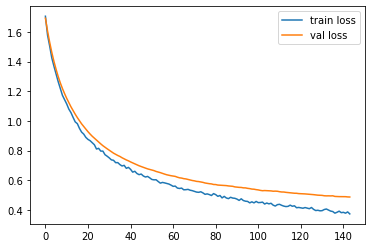

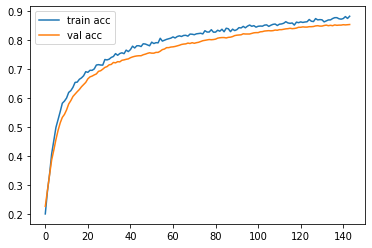

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/LossVal_cassmobnet_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/AccVal_cassmobnet_acc')

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/LossVal_cassmobnet_loss224')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('/content/drive/MyDrive/AccVal_cassmobnet_acc224')

In [ ]:
filepath1="/content/drive/MyDrive/cassava-aug-mobile224.hdf5"
filepath2="/content/drive/MyDrive/casssava-aug-mobile224.h5"


model.save(filepath1)
model.save(filepath2)

In [ ]:
from keras.preprocessing import image 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np


In [ ]:
img_size=224
test_datagen = ImageDataGenerator(
   
    rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/cassava_aug_data/test',
        target_size=(img_size, img_size),
        batch_size=32,
        class_mode='categorical',
        shuffle=False)

Found 200 images belonging to 5 classes.


In [ ]:
from tensorflow import keras
filepath1="/content/drive/MyDrive/cassava-aug-mobile224.hdf5"
model = keras.models.load_model(filepath1)

In [ ]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
target_names = []

for key in train_generator.class_indices:

    target_names.append(key)

In [ ]:
predict = model.predict_generator(valid_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
predict1=model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
y_pred = np.argmax(predict, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(valid_generator.classes, y_pred)
print(cm)

import itertools
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')




In [ ]:
print(classification_report(valid_generator.classes, y_pred, target_names=target_names))

NameError: ignored

In [ ]:
y_pred = np.argmax(predict1, axis=1)

print('Confusion Matrix')

cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)

import itertools
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [ ]:
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [ ]:
pip install keract

In [ ]:
from tensorflow import keras
x_batch, y_batch = next(train_generator)
model = keras.models.load_model('/content/drive/MyDrive/casssava-aug-mobile.h5')

#visualizing mobile net (dense net not working for visualization)
from keract import get_activations, display_activations
keract_inputs = x_batch[:1]
keract_targets = y_batch[:1]
activations = get_activations(model, keract_inputs)
display_activations(activations, cmap="gray", save=False)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from tensorflow import keras
classifier = keras.models.load_model("/content/drive/MyDrive/casssava-aug-mobile.h5")

In [ ]:
class_dict = train_generator.class_indices
print(class_dict)
li = list(class_dict.keys())
print(li)

{'cbb': 0, 'cbsd': 1, 'cgm': 2, 'cmd': 3, 'healthy': 4}
['cbb', 'cbsd', 'cgm', 'cmd', 'healthy']


Following is our prediction:


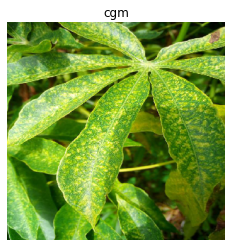

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
image_path = "/content/drive/MyDrive/cassava_aug_data/test/test_cgm/139341665.jpg"
new_img = image.load_img(image_path, target_size=(336, 336))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

     
        
##Another way
#img_class = classifier.predict_classes(img)
#img_prob = classifier.predict_proba(img)
#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()